Required packages

In [601]:
#Loading required packages
import requests
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Getting Bloomberg data using API

The Data is from work and therefore I am not allowed to share the code of the API. But I have downloaded it as an excel which is being loaded in the next datastep

Data download

In [602]:
# Load the Excel file, specifying the header rows
file_path = 'Historisk Index data.xlsx'
df = pd.read_excel(file_path, header=[2])

# Display the loaded DataFrame
# Juster displayindstillingerne
pd.set_option('display.max_columns', None)  # Vis alle kolonner
pd.set_option('display.expand_frame_repr', False)  # Forhindr brud på linjer
pd.set_option('display.max_colwidth', None)  # Vis fulde kolonnebredder
display(pd.concat([df.head(3), df.tail(3)]))

,Dates,Denmark,USA,England,Germany,France,Italy,Spain,Netherlands,Sweden,SCHWEIZ,Finland,Belgium,Austria,Portugal,Greece,Ireland,Luxembourg,TJEKKIET,POLAN,UNGARN,Norway
0,1927-12-30,NaN,17.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928-01-02,NaN,17.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1928-01-03,NaN,17.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25210,2024-08-16,2738.723,5554.25,8311.41,18322.40,7449.70,33040.81,10949.7,905.67,2533.093,12188.73,4522.56,4075.78,3627.33,6655.90,1431.88,9516.44,1353.697,1574.33,2421.06,72282.1,1352.08
25211,2024-08-19,2739.167,5608.25,8356.94,18421.69,7502.01,33266.32,11102.5,908.85,2540.826,12275.24,4566.48,4084.74,3666.20,6723.81,1432.28,9551.47,1373.246,1582.10,2426.89,72282.1,1356.71
25212,2024-08-20,2731.704,5608.25,8320.42,18488.04,7531.00,33448.61,11133.5,909.83,2541.460,12299.08,4584.77,4089.15,3670.43,6724.35,1431.15,9579.42,1377.325,1581.58,2409.93,72282.1,1345.56


Election data

In [603]:
# Define election dates DK
DK_election_dates = [
    '1984-01-10',  # 1984 election (Blue)
    '1987-09-08',  # 1987 election (Blue)
    '1988-05-10',  # 1988 election (Blue)
    '1990-12-12',  # 1990 election (Blue)
    '1994-09-21',  # 1994 election (Red)
    '1998-03-11',  # 1998 election (Red)
    '2001-11-20',  # 2001 election (Blue)
    '2005-02-08',  # 2005 election (Blue)
    '2007-11-13',  # 2007 election (Blue)
    '2011-09-15',  # 2011 election (Red)
    '2015-06-18',  # 2015 election (Blue)
    '2019-06-05',  # 2019 election (Red)
    '2022-11-01'   # 2022 election (Red)
]

# Convert election dates to datetime objects
DK_election_dates = pd.to_datetime(DK_election_dates)

# Create a list to define the periods of "Red" and "Blue"
DK_periods = [
    ('1984-01-10', '1987-09-07', 'Blue'),  # Post-1984 election
    ('1987-09-08', '1988-05-09', 'Blue'),  # Post-1987 election
    ('1988-05-10', '1990-12-11', 'Blue'),  # Post-1988 election
    ('1990-12-12', '1994-09-20', 'Blue'),  # Post-1990 election
    ('1994-09-21', '2001-11-19', 'Red'),  # Post-1994 election
    ('2001-11-20', '2011-09-14', 'Blue'),  # Post-2001 election
    ('2011-09-15', '2015-06-17', 'Red'),  # Post-2011 election
    ('2015-06-18', '2019-06-04', 'Blue'),  # Post-2015 election
    ('2019-06-05', '2024-08-08', 'Red')   # Post-2019 election
]


In [604]:
# Define election dates USA
USA_election_dates = [
    '1924-11-04',
    '1928-11-06',
    '1932-11-08',
    '1936-11-03',
    '1940-11-05',
    '1944-11-07',
    '1948-11-02',
    '1952-11-04',
    '1956-11-06',
    '1960-11-08',
    '1964-11-03',
    '1968-11-05',
    '1972-11-07',
    '1976-11-02',
    '1980-11-04',
    '1984-11-06',
    '1988-11-08',
    '1992-11-03',
    '1996-11-05',
    '2000-11-07',
    '2004-11-02',
    '2008-11-04',
    '2012-11-06',
    '2016-11-08',
    '2020-11-03'
]

# Convert election dates to datetime objects
USA_election_dates = pd.to_datetime(USA_election_dates)

# Define the winning parties (Republican = Blue, Democrat = Red)
USA_periods = [
    ('1924-11-04', '1928-11-05', 'Blue'),  # Republican (Calvin Coolidge)
    ('1928-11-06', '1932-11-07', 'Blue'),  # Republican (Herbert Hoover)
    ('1932-11-08', '1952-11-03', 'Red'),  # Democrat (Franklin D. Roosevelt, Harry S. Truman)
    ('1952-11-04', '1960-11-07', 'Blue'),  # Republican (Dwight D. Eisenhower)
    ('1960-11-08', '1968-11-04', 'Red'),  # Democrat (John F. Kennedy, Lyndon B. Johnson)
    ('1968-11-05', '1976-11-01', 'Blue'),  # Republican (Richard Nixon, Gerald Ford)
    ('1976-11-02', '1980-11-03', 'Red'),  # Democrat (Jimmy Carter)
    ('1980-11-04', '1992-11-02', 'Blue'),  # Republican (Ronald Reagan, George H. W. Bush)
    ('1992-11-03', '2000-11-06', 'Red'),  # Democrat (Bill Clinton)
    ('2000-11-07', '2008-11-03', 'Blue'),  # Republican (George W. Bush)
    ('2008-11-04', '2016-11-07', 'Red'),  # Democrat (Barack Obama)
    ('2016-11-08', '2020-11-02', 'Blue'),  # Republican (Donald Trump)
    ('2020-11-03', '2024-11-04', 'Red')   # Democrat (Joe Biden)
]


In [605]:
# Define election dates UK
UK_election_dates = [
    '1983-06-09',  # 1983 election (Blue)
    '1987-06-11',  # 1987 election (Blue)
    '1992-04-09',  # 1992 election (Blue)
    '1997-05-01',  # 1997 election (Red)
    '2001-06-07',  # 2001 election (Red)
    '2005-05-05',  # 2005 election (Red)
    '2010-05-06',  # 2010 election (Blue)
    '2015-05-07',  # 2015 election (Blue)
    '2017-06-08',  # 2017 election (Blue)
    '2019-12-12'   # 2019 election (Blue)
]

# Convert election dates to datetime objects
UK_election_dates = pd.to_datetime(UK_election_dates)

# Define the winning parties (Conservative = Blue, Labour = Red)
UK_periods = [
    ('1983-06-09', '1987-06-10', 'Blue'),  # Conservative
    ('1987-06-11', '1992-04-08', 'Blue'),  # Conservative
    ('1992-04-09', '1997-04-30', 'Blue'),  # Conservative
    ('1997-05-01', '2010-05-05', 'Red'),  # Labour
    ('2010-05-06', '2024-05-05', 'Blue')   # Conservative
]


In [606]:
# Define election dates DE (West Germany before 1990)
DE_election_dates = [
    '1957-09-15',  # 1957 election (Blue)
    '1961-09-17',  # 1961 election (Blue)
    '1965-09-19',  # 1965 election (Blue)
    '1969-09-28',  # 1969 election (Red)
    '1972-11-19',  # 1972 election (Red)
    '1976-10-03',  # 1976 election (Red)
    '1980-10-05',  # 1980 election (Red)
    '1983-03-06',  # 1983 election (Blue)
    '1987-01-25',  # 1987 election (Blue)
    '1990-12-02',  # 1990 election (Blue)
    '1994-10-16',  # 1994 election (Blue)
    '1998-09-27',  # 1998 election (Red)
    '2002-09-22',  # 2002 election (Red)
    '2005-09-18',  # 2005 election (Blue)
    '2009-09-27',  # 2009 election (Blue)
    '2013-09-22',  # 2013 election (Blue)
    '2017-09-24',  # 2017 election (Blue)
    '2021-09-26'   # 2021 election (Red)
]

# Convert election dates to datetime objects
DE_election_dates = pd.to_datetime(DE_election_dates)

# Define the winning parties (CDU/CSU = Blue, SPD = Red)
DE_periods = [
    ('1957-09-15', '1961-09-16', 'Blue'),  # CDU/CSU
    ('1961-09-17', '1969-09-27', 'Blue'),  # CDU/CSU
    ('1969-09-28', '1982-10-01', 'Red'),  # SPD
    ('1982-10-02', '1998-09-26', 'Blue'),  # CDU/CSU
    ('1998-09-27', '2005-09-17', 'Red'),  # SPD
    ('2005-09-18', '2021-09-25', 'Blue'),  # CDU/CSU
    ('2021-09-26', '2025-09-30', 'Red')   # SPD
]


In [607]:
# Define election dates FR
FR_election_dates = [
    '1988-05-08',  # 1988 election
    '1995-05-07',
    '2002-05-05',
    '2007-05-06',
    '2012-05-06',
    '2017-05-07',
    '2022-04-24'
]

# Convert election dates to datetime objects
FR_election_dates = pd.to_datetime(FR_election_dates)

# Define the winning parties (RPR/UMP = Blue, PS = Red, REM = Center, treated as Blue here)
FR_periods = [
    ('1988-05-08', '1995-05-06', 'Red'),  # PS (François Mitterrand)
    ('1995-05-07', '2012-05-05', 'Blue'),  # RPR/UMP
    ('2012-05-06', '2017-05-06', 'Red'),  # PS (François Netherlandse)
    ('2017-05-07', '2027-04-23', 'Blue')   # REM (Emmanuel Macron)
]


In [608]:
# Define election dates IT
IT_election_dates = [
    '1994-03-27',
    '1996-04-21',
    '2001-05-13',
    '2006-04-09',
    '2008-04-13',
    '2013-02-24',
    '2018-03-04',
    '2022-09-25'
]

# Convert election dates to datetime objects
IT_election_dates = pd.to_datetime(IT_election_dates)

# Define the winning parties (Center-right = Blue, Center-left = Red)
IT_periods = [
    ('1994-03-27', '1996-04-20', 'Blue'),  # Center-right
    ('1996-04-21', '2001-05-12', 'Red'),  # Center-left
    ('2001-05-13', '2006-04-08', 'Blue'),  # Center-right
    ('2006-04-09', '2008-04-12', 'Red'),  # Center-left
    ('2008-04-13', '2013-02-23', 'Blue'),  # Center-right
    ('2013-02-24', '2018-03-03', 'Red'),  # Center-left
    ('2018-03-04', '2022-09-24', 'Blue'),  # Center-right
    ('2022-09-25', '2027-09-24', 'Blue')   # Center-right
]


In [609]:
# Define election dates ES
ES_election_dates = [
    '1986-06-22',  # 1986 election
    '1993-06-06',  # 1993 election
    '1996-03-03',  # 1996 election
    '2000-03-12',  # 2000 election
    '2004-03-14',  # 2004 election
    '2008-03-09',  # 2008 election
    '2011-11-20',  # 2011 election
    '2015-12-20',  # 2015 election
    '2016-06-26',  # 2016 election
    '2019-04-28',  # 2019 April election
    '2019-11-10'   # 2019 November election
]

# Convert election dates to datetime objects
ES_election_dates = pd.to_datetime(ES_election_dates)

# Define the winning parties (PP = Blue, PSOE = Red)
ES_periods = [
    ('1986-06-22', '1996-03-02', 'Red'),  # PSOE
    ('1996-03-03', '2004-03-13', 'Blue'),  # PP
    ('2004-03-14', '2011-11-19', 'Red'),  # PSOE
    ('2011-11-20', '2019-04-27', 'Blue'),  # PP
    ('2019-04-28', '2023-12-19', 'Red')   # PSOE
]


In [610]:
# Define election dates NL
NL_election_dates = [
    '1981-05-26',
    '1982-09-08',
    '1986-05-21',
    '1989-09-06',
    '1994-05-03',
    '1998-05-06',
    '2002-05-15',
    '2003-01-22',
    '2006-11-22',
    '2010-06-09',
    '2012-09-12',
    '2017-03-15',
    '2021-03-17'
]

# Convert election dates to datetime objects
NL_election_dates = pd.to_datetime(NL_election_dates)

# Define the winning parties (VVD = Blue, PvdA = Red)
NL_periods = [
    ('1981-05-26', '1982-09-07', 'Red'),  # PvdA
    ('1982-09-08', '1986-05-20', 'Blue'),  # CDA (Christian Democratic Appeal)
    ('1986-05-21', '1994-05-02', 'Blue'),  # CDA (Christian Democratic Appeal)
    ('1994-05-03', '2002-05-14', 'Red'),  # PvdA (Labour Party)
    ('2002-05-15', '2024-03-16', 'Blue')   # VVD (People's Party for Freedom and Democracy)
]


In [611]:
# Define election dates SE
SE_election_dates = [
    '1985-09-15',  # 1985 election
    '1988-09-18',  # 1988 election
    '1991-09-15',  # 1991 election
    '1994-09-18',  # 1994 election
    '1998-09-20',  # 1998 election
    '2002-09-15',  # 2002 election
    '2006-09-17',  # 2006 election
    '2010-09-19',  # 2010 election
    '2014-09-14',  # 2014 election
    '2018-09-09',  # 2018 election
    '2022-09-11'   # 2022 election
]

# Convert election dates to datetime objects
SE_election_dates = pd.to_datetime(SE_election_dates)

# Define the winning parties (Moderate Party = Blue, Social Democrats = Red)
SE_periods = [
    ('1985-09-15', '1991-09-14', 'Red'),  # Social Democrats
    ('1991-09-15', '1994-09-17', 'Blue'),  # Moderate Party
    ('1994-09-18', '2006-09-16', 'Red'),  # Social Democrats
    ('2006-09-17', '2014-09-13', 'Blue'),  # Moderate Party
    ('2014-09-14', '2022-09-11', 'Red'),   # Social Democrats
    ('2022-09-12', '2024-09-12', 'Blue')  # Moderate Party
]


In [612]:
# Define election dates CH / not EU
CH_election_dates = [
    '1991-10-20',
    '1995-10-22',
    '1999-10-24',
    '2003-10-19',
    '2007-10-21',
    '2011-10-23',
    '2015-10-18',
    '2019-10-20'
]

# Convert election dates to datetime objects
CH_election_dates = pd.to_datetime(CH_election_dates)

# Define the winning parties (SVP = Blue, SP = Red)
CH_periods = [
    ('1991-10-20', '2024-10-18', 'Blue')   # SVP
]


In [613]:
# Define election dates FI
FI_election_dates = [
    '1987-03-15',  # 1987 election
    '1991-03-17',  # 1991 election
    '1995-03-19',  # 1995 election
    '1999-03-21',  # 1999 election
    '2003-03-16',  # 2003 election
    '2007-03-18',  # 2007 election
    '2011-04-17',  # 2011 election
    '2015-04-19',  # 2015 election
    '2019-04-14',  # 2019 election
    '2023-04-02'   # 2023 election
]


# Convert election dates to datetime objects
FI_election_dates = pd.to_datetime(FI_election_dates)

# Define the winning parties (corrected to match Finnish political colors)
# Define the winning parties (corrected to match Finnish political colors)
FI_periods = [
    ('1987-03-15', '1991-03-16', 'Blue'),  # National Coalition Party (Kokoomus)
    ('1991-03-17', '1995-03-18', 'Blue'),  # National Coalition Party (Kokoomus)
    ('1995-03-19', '2003-03-15', 'Red'),  # Social Democrats (SDP)
    ('2003-03-16', '2007-03-17', 'Red'),  # Social Democrats (SDP)
    ('2007-03-18', '2011-04-16', 'Blue'),  # National Coalition Party (Kokoomus)
    ('2011-04-17', '2019-04-01', 'Blue'),  # National Coalition Party (Kokoomus) & Centre Party (Keskusta)
    ('2019-04-14', '2023-04-01', 'Red'),  # Social Democrats (SDP)
    ('2023-04-02', '2024-04-01', 'Blue')   # National Coalition Party (Kokoomus)
]



In [614]:
# Define election dates BE
BE_election_dates = [
    '1991-11-24',
    '1995-05-21',
    '1999-06-13',
    '2003-05-18',
    '2007-06-10',
    '2010-06-13',
    '2014-05-25',
    '2019-05-26'
]

# Convert election dates to datetime objects
BE_election_dates = pd.to_datetime(BE_election_dates)

# Define the winning parties (Coalition, generally mix, using Red or Blue based on predominant PM's party)
BE_periods = [
    ('1991-11-24', '1999-06-12', 'Blue'),  # Christian Democrats
    ('1999-06-13', '2024-06-12', 'Red')   # Liberal and Socialist coalition, shifting predominantly to Red
]


In [615]:
# Define election dates AT
AT_election_dates = [
    '1986-11-23',
    '1990-10-07',
    '1994-10-09',
    '1995-12-17',
    '1999-10-03',
    '2002-11-24',
    '2006-10-01',
    '2008-09-28',
    '2013-09-29',
    '2017-10-15',
    '2019-09-29'
]

# Convert election dates to datetime objects
AT_election_dates = pd.to_datetime(AT_election_dates)

# Define the winning parties (ÖVP = Blue, SPÖ = Red)
AT_periods = [
    ('1986-11-23', '2000-02-03', 'Red'),  # SPÖ
    ('2000-02-04', '2006-10-01', 'Blue'),  # ÖVP
    ('2006-10-02', '2017-05-17', 'Red'),  # SPÖ-led coalition
    ('2017-10-15', '2024-09-28', 'Blue')   # ÖVP
]



In [616]:
# Define election dates PT
PT_election_dates = [
    '1991-10-06',
    '1995-10-01',
    '1999-10-10',
    '2002-03-17',
    '2005-02-20',
    '2009-09-27',
    '2011-06-05',
    '2015-10-04',
    '2019-10-06',
    '2022-01-30',
    '2024-03-10'
]

# Convert election dates to datetime objects
PT_election_dates = pd.to_datetime(PT_election_dates)

# Define the winning parties (PSD = Blue, PS = Red)
PT_periods = [
    ('1991-10-06', '1995-10-01', 'Blue'),  # PSD
    ('1995-10-02', '2002-03-16', 'Red'),  # PS
    ('2002-03-17', '2005-02-19', 'Blue'),  # PSD
    ('2005-02-20', '2011-06-04', 'Red'),  # PS
    ('2011-06-05', '2015-10-03', 'Blue'),  # PSD
    ('2015-10-04', '2024-03-09', 'Red'),   # PS
    ('2024-03-10', '2026-03-10', 'Blue')
]


In [617]:
# Define election dates GR
GR_election_dates = [
    '1981-10-18',
    '1985-06-02',
    '1989-06-18',
    '1989-11-05',
    '1990-04-08',
    '1993-10-10',
    '1996-09-22',
    '2000-04-09',
    '2004-03-07',
    '2007-09-16',
    '2009-10-04',
    '2012-05-06',
    '2012-06-17',
    '2015-01-25',
    '2015-09-20',
    '2019-07-07'
]


# Convert election dates to datetime objects
GR_election_dates = pd.to_datetime(GR_election_dates)

# Define the winning parties (New Democracy = Blue, PASOK/SYRIZA = Red)
GR_periods = [
    ('1981-10-18', '1989-06-17', 'Red'),  # PASOK under Andreas Papandreou
    ('1989-06-18', '1989-11-04', 'Blue'),  # New Democracy under Tzannis Tzannetakis
    ('1989-11-05', '1990-04-07', 'Blue'),  # New Democracy under Xenophon Zolotas (Caretaker government)
    ('1990-04-08', '1993-10-09', 'Blue'),  # New Democracy under Konstantinos Mitsotakis
    ('1993-10-10', '2004-03-06', 'Red'),  # PASOK under Andreas Papandreou and Costas Simitis
    ('2004-03-07', '2009-10-03', 'Blue'),  # New Democracy under Kostas Karamanlis
    ('2009-10-04', '2011-11-10', 'Red'),  # PASOK under George Papandreou
    ('2011-11-11', '2015-01-24', 'Blue'),  # Coalition government primarily under New Democracy's Antonis Samaras
    ('2015-01-25', '2019-07-06', 'Red'),  # SYRIZA under Alexis Tsipras
    ('2019-07-07', '2024-07-06', 'Blue')   # New Democracy under Kyriakos Mitsotakis
]


In [618]:
# Define election dates IE
IE_election_dates = [
    '1981-06-11',
    '1982-02-18',
    '1982-11-24',
    '1987-02-17',
    '1989-06-15',
    '1992-11-25',
    '1997-06-06',
    '2002-05-17',
    '2007-05-24',
    '2011-02-25',
    '2016-02-26',
    '2020-02-08'
]

# Convert election dates to datetime objects
IE_election_dates = pd.to_datetime(IE_election_dates)

# Define the winning parties (Fine Gael = Blue, Fianna Fáil = Red)
IE_periods = [
    ('1981-06-11', '1982-02-17', 'Blue'),  # Fine Gael-led coalition
    ('1982-02-18', '1982-11-23', 'Red'),  # Fianna Fáil
    ('1982-11-24', '1987-02-16', 'Blue'),  # Fine Gael-led coalition
    ('1987-02-17', '1992-11-24', 'Red'),  # Fianna Fáil
    ('1992-11-25', '1997-06-05', 'Red'),  # Fianna Fáil-Labour
    ('1997-06-06', '2011-02-24', 'Red'),  # Fianna Fáil
    ('2011-02-25', '2020-02-07', 'Blue'),  # Fine Gael
    ('2020-02-08', '2022-12-16', 'Red'),   # Fianna Fáil (rotating Taoiseach with Fine Gael)
    ('2022-12-17', '2024-02-07', 'Blue')   # Fine Gael (Leo Varadkar)
]


In [619]:
# Define election dates LU
LU_election_dates = [
    '1994-06-12',
    '1999-06-13',
    '2004-06-13',
    '2009-06-07',
    '2013-10-20',
    '2018-10-14',
    '2023-10-08'
]

# Convert election dates to datetime objects
LU_election_dates = pd.to_datetime(LU_election_dates)

# Define the winning parties (Christian Social People's Party = Blue, LSAP = Red)
LU_periods = [
    ('1994-06-12', '2013-10-19', 'Blue'),  # CSV
    ('2013-10-20', '2023-10-07', 'Red'),  # LSAP-led coalition
    ('2023-10-08', '2024-10-13', 'Blue')   # CSV-led coalition post-2023 election
]



In [620]:
# Define election dates NO
NO_election_dates = [
    '1993-09-13',
    '1997-09-15',
    '2001-09-10',
    '2005-09-12',
    '2009-09-14',
    '2013-09-09',
    '2017-09-11',
    '2021-09-13'
]

# Convert election dates to datetime objects
NO_election_dates = pd.to_datetime(NO_election_dates)

# Define the winning parties (Høyre = Blue, Arbeiderpartiet = Red)
NO_periods = [
    ('1993-09-13', '1997-10-16', 'Red'),  # Labour under Gro Harlem Brundtland and Thorbjørn Jagland
    ('1997-10-17', '2000-03-16', 'Blue'),  # Christian Democratic Party (KrF) with Conservative support under Kjell Magne Bondevik
    ('2000-03-17', '2001-10-18', 'Red'),  # Labour under Jens Stoltenberg
    ('2001-10-19', '2005-10-16', 'Blue'),  # Conservative-supported coalition under Kjell Magne Bondevik
    ('2005-10-17', '2013-10-14', 'Red'),  # Labour under Jens Stoltenberg
    ('2013-10-15', '2021-09-12', 'Blue'),   # Conservative under Erna Solberg
    ('2021-09-13', '2024-09-13', 'Red')
]


Defining Data lists

In [621]:
# Define the list of country abbreviations and corresponding column names
countries = {
    'DK': ('Denmark', DK_election_dates, DK_periods),
    'USA': ('USA', USA_election_dates, USA_periods),
    'UK': ('England', UK_election_dates, UK_periods),
    'DE': ('Germany', DE_election_dates, DE_periods),
    'FR': ('France', FR_election_dates, FR_periods),
    'IT': ('Italy', IT_election_dates, IT_periods),
    'ES': ('Spain', ES_election_dates, ES_periods),
    'NL': ('Netherlands', NL_election_dates, NL_periods),
    'SE': ('Sweden', SE_election_dates, SE_periods),
    #'CH': ('SCHWEIZ', CH_election_dates, CH_periods),
    'FI': ('Finland', FI_election_dates, FI_periods),
    'BE': ('Belgium', BE_election_dates, BE_periods),
    'AT': ('Austria', AT_election_dates, AT_periods),
    'PT': ('Portugal', PT_election_dates, PT_periods),
    'GR': ('Greece', GR_election_dates, GR_periods),
    'IE': ('Ireland', IE_election_dates, IE_periods),
    'LU': ('Luxembourg', LU_election_dates, LU_periods),
    'NO': ('Norway', NO_election_dates, NO_periods)
}

# Loop through the countries and create a DataFrame for each
for abbrev, (country_name, election_dates, periods) in countries.items():
    # Extract the relevant columns
    globals()[abbrev] = df.loc[:, ['Dates', country_name]].copy()
    
    # Optionally print the DataFrame for verification
    #print(f"{abbrev} DataFrame:")
    #print(globals()[abbrev].head())
    #print("\n")


Data rens

In [622]:
# Loop through the countries and create a DataFrame for each
for abbrev, (country_name, election_dates, periods) in countries.items():
    df_country = df.loc[:, ['Dates', country_name]].copy()
    
    # Convert the 'Dates' column to datetime format
    df_country['Dates'] = pd.to_datetime(df_country['Dates'], format='%d-%m-%Y')

    # Generate a complete date range
    full_date_range = pd.date_range(start='1927-12-30', end='2024-08-08', freq='D')

    # Reindex the DataFrame to include the full date range, filling in missing dates
    df_country.set_index('Dates', inplace=True)
    df_country = df_country.reindex(full_date_range)

    # Reset the index to include 'Dates' as a column again
    df_country.reset_index(inplace=True)
    df_country.rename(columns={'index': 'Dates'}, inplace=True)

    # Add a new column 'Election' to indicate whether the row is an election date
    df_country['Election'] = df_country['Dates'].isin(election_dates)

    # Initialize the new column
    df_country['Color'] = pd.NA

    # Assign "Red" or "Blue" based on the defined periods
    for start, end, color in periods:
        df_country.loc[(df_country['Dates'] >= start) & (df_country['Dates'] <= end), 'Color'] = color

    # Forward fill missing data to handle weekends and holidays
    df_country[country_name] = df_country[country_name].ffill()

    # Find the first valid index where the country column has a non-NaN value
    first_valid_index = df_country[country_name].first_valid_index()

    # Slice the DataFrame from that index onward
    df_country = df_country.loc[first_valid_index:].reset_index(drop=True)

    # Store the result in the global variable
    globals()[abbrev] = df_country

    # Optionally print the DataFrame for verification
    #print(f"{abbrev} DataFrame:")
    #print(df_country.head())
    #print("\n")

3M samt Stovall udregnes

In [623]:
# Loop through the countries and apply the process to each DataFrame
for abbrev, (country_name, election_dates, periods) in countries.items():
    # Rename the DataFrame from the country abbreviation to 'data'
    data = globals()[abbrev]

    # Ensure 'Dates' is set as the index for proper time series operations
    data.set_index('Dates', inplace=True)

    # Calculate direct returns for 3 months before each election date
    data['Return_3M'] = pd.NA
    data['Return_3M_Stovall'] = pd.NA

    for date in election_dates:
        if date in data.index:
            # Calculate Return_3M
            data.loc[date, 'Return_3M'] = (data.loc[date, country_name] / data.loc[date - pd.DateOffset(months=3), country_name] - 1) * 100
            
            # Calculate the start and end dates for the Stovall calculation
            start_date = (pd.to_datetime(date) - pd.DateOffset(months=3)).replace(day=1)
            end_date = pd.to_datetime(date).replace(day=1) - pd.DateOffset(days=1)
            
            # Calculate Return_3M_Stovall
            if start_date in data.index and end_date in data.index:
                data.loc[date, 'Return_3M_Stovall'] = (data.loc[end_date, country_name] / data.loc[start_date, country_name] - 1) * 100

    # Reset the index to include 'Dates' as a column again
    data.reset_index(inplace=True)

    # Filter DataFrame to include only rows where 'Election' is True
    election_data = data[data['Election']].copy()

    # Add the 'Incumbent' column: 'Blue' if previous color was Blue, 'Red' otherwise
    election_data['Incumbent'] = election_data['Color'].shift(1).apply(lambda x: 'Blue' if x == 'Blue' else 'Red')

    # Handle the first row specifically (if required)
    first_row_index = election_data.index[0]
    election_data.loc[first_row_index, 'Incumbent'] = election_data.loc[first_row_index, 'Color']

    # Add the 'Winner' column: 'Blue' if Blue, 'Red' otherwise
    election_data['Winner'] = election_data['Color'].apply(lambda x: 'Blue' if x == 'Blue' else 'Red')

    # Add the 'Prediction' column based on the given conditions
    election_data['Prediction'] = election_data.apply(
        lambda row: (
            True if (row['Return_3M'] < 0 and row['Incumbent'] != row['Winner']) or 
                     (row['Return_3M'] >= 0 and row['Incumbent'] == row['Winner'])
            else False
        ), axis=1
    )

    # Add the 'Prediction_Stovall' column based on the given conditions
    election_data['Prediction_Stovall'] = election_data.apply(
        lambda row: (
            True if (row['Return_3M_Stovall'] < 0 and row['Incumbent'] != row['Winner']) or 
                     (row['Return_3M_Stovall'] >= 0 and row['Incumbent'] == row['Winner'])
            else False
        ), axis=1
    )

    # Now, ensure the 'Incumbent', 'Winner', 'Prediction', and 'Prediction_Stovall' columns are added back to the original data
    data = data.merge(election_data[['Dates', 'Incumbent', 'Winner', 'Prediction', 'Prediction_Stovall']], on='Dates', how='left')

    # Store the updated data back in the global variable
    globals()[abbrev] = data

    # Optionally print or display the DataFrame for verification
    #print(f"Election data for {abbrev}:")
    #display(election_data.drop(columns=['Election', 'Color', 'Return_3M', 'Return_3M_Stovall']))
    #print("\n")  # Add a newline for better readability between countries


Excel

In [624]:
# Create an Excel writer object
#with pd.ExcelWriter('all_countries_data.xlsx', engine='xlsxwriter') as writer:
#    # Loop through the countries and write each to a separate sheet
#    for abbrev, (country_name, election_dates, periods) in countries.items():
#        data = globals()[abbrev]  # Get the DataFrame for the current country
#        
#        # Write the DataFrame to a sheet named after the country's abbreviation
#        data.to_excel(writer, sheet_name=abbrev, index=False)

Tabeller

In [625]:
# Generate tables for each country and display them side by side
all_tables = []
for abbrev, (country_name, election_dates, periods) in countries.items():
    data = globals()[abbrev]  # Get the DataFrame for the current country

    # Filter DataFrame to only include election rows and the required columns
    election_data = data[data['Election']].copy()

    # Convert the filtered data to an HTML table and add a title
    table_html = f"""
    <div style="display: inline-block; vertical-align: top; width: 30%; padding: 10px;">
        <h4>{country_name}</h4>
        {election_data[['Dates', 'Incumbent', 'Winner', 'Return_3M_Stovall', 'Prediction_Stovall']].to_html(index=False)}
    </div>
    """

    # Append the HTML string of the table to the list
    all_tables.append(table_html)

# Combine all tables into a single HTML block and display them
from IPython.display import display, HTML
display(HTML(''.join(all_tables)))


Dates,Incumbent,Winner,Return_3M_Stovall,Prediction_Stovall
1990-12-12,Blue,Blue,-9.496501,False
1994-09-21,Blue,Red,-3.348995,True
1998-03-11,Red,Red,11.765617,True
2001-11-20,Red,Blue,-16.880769,True
2005-02-08,Blue,Blue,5.794678,True
2007-11-13,Blue,Blue,2.88446,True
2011-09-15,Blue,Red,-20.929189,True
2015-06-18,Red,Blue,11.124567,False
2019-06-05,Blue,Red,-1.602118,True
2022-11-01,Red,Red,-7.920246,False


Plot

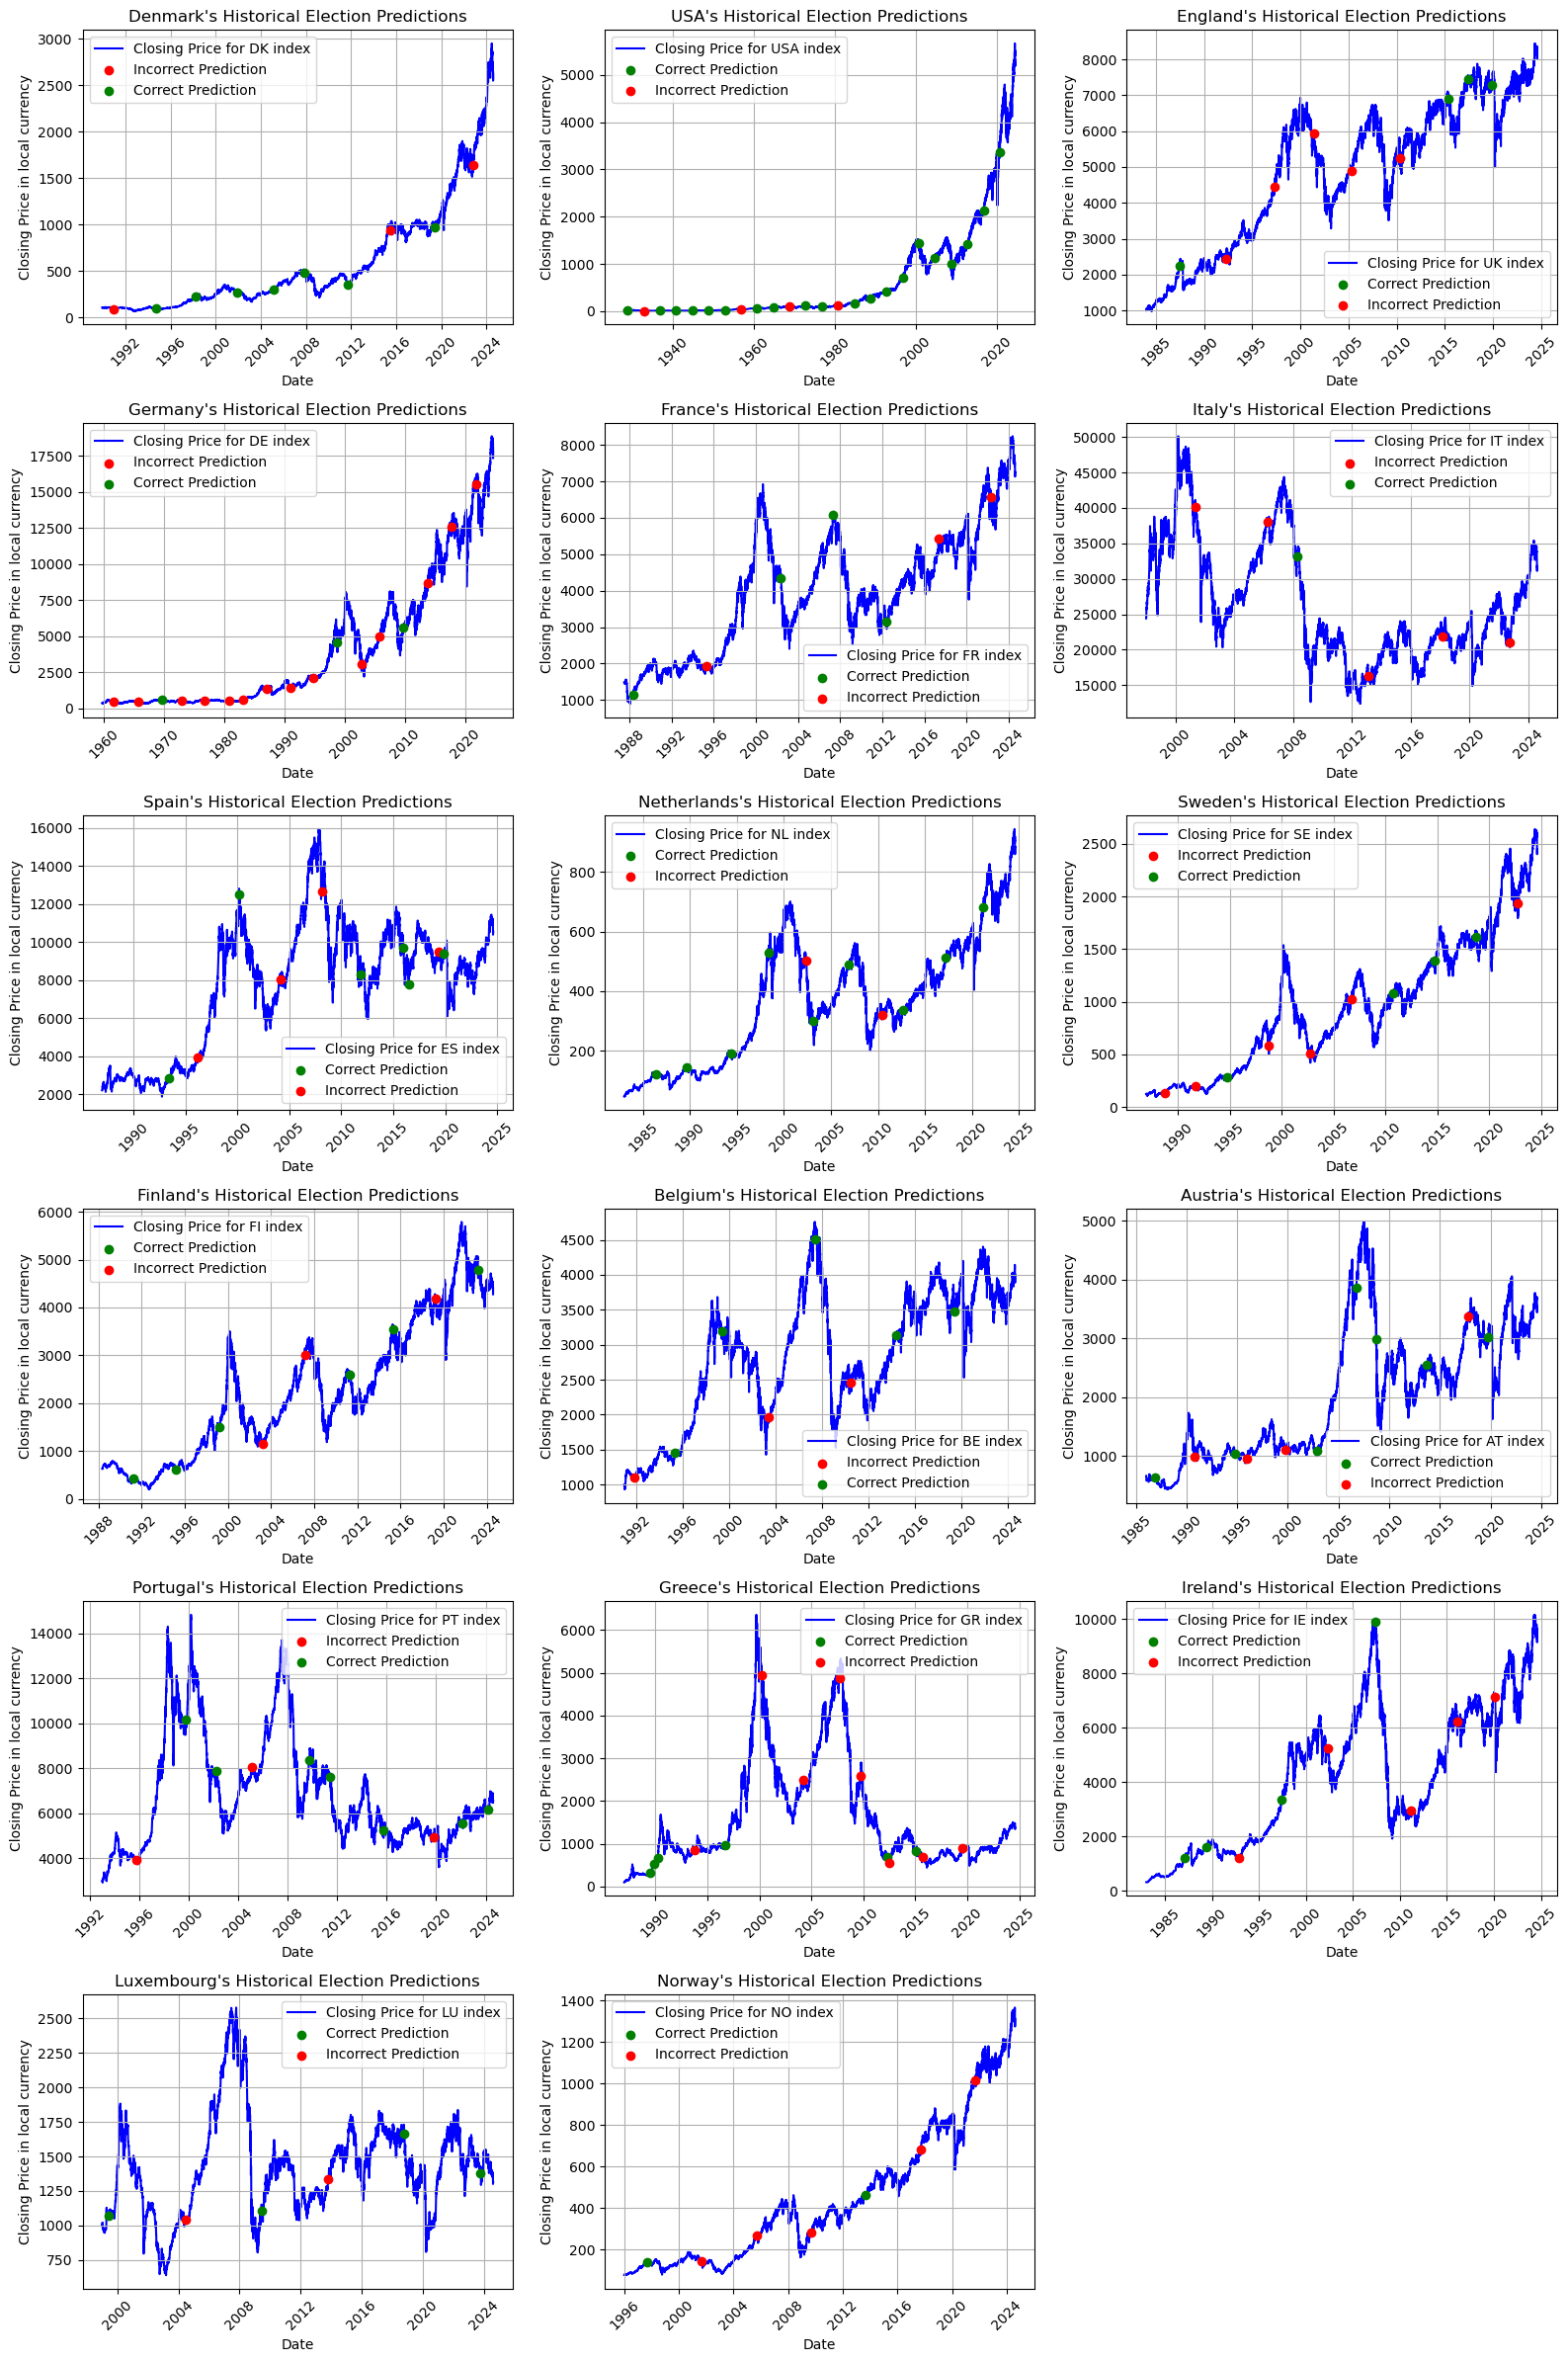

In [627]:
import matplotlib.pyplot as plt
import math

# Determine the number of plots per row
plots_per_row = 3  # You can adjust this to fit more plots per row
total_countries = len(countries)
rows = math.ceil(total_countries / plots_per_row)

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(16, 4 * rows))

# Flatten the axes array for easy iteration if necessary
axes = axes.flatten()

# Loop through the countries and plot the data for each
for idx, (abbrev, (country_name, election_dates, periods)) in enumerate(countries.items()):
    data = globals()[abbrev]  # Get the DataFrame for the current country
    
    # Filter the data to start from the first available date after cleaning
    start_date = data['Dates'].min()
    data_filtered = data[data['Dates'] >= start_date]

    # Select the axis for the current plot
    ax = axes[idx]

    # Plotting the historical returns
    ax.plot(data_filtered['Dates'], data_filtered[country_name], label=f'Closing Price for {abbrev} index', color='blue', zorder=1)

    # Plot the Prediction_Stovall markers only on election dates
    election_data = data_filtered[data_filtered['Election']]  # Filter only election dates
    for _, row in election_data.iterrows():
        if row['Prediction_Stovall']:
            ax.scatter(row['Dates'], row[country_name], color='green', marker='o', zorder=2, label='Correct Prediction' if 'Correct Prediction' not in ax.get_legend_handles_labels()[1] else "")
        else:
            ax.scatter(row['Dates'], row[country_name], color='red', marker='o', zorder=2, label='Incorrect Prediction' if 'Incorrect Prediction' not in ax.get_legend_handles_labels()[1] else "")

    # Adding titles and labels
    ax.set_title(f"{country_name}'s Historical Election Predictions")
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price in local currency')

    # Formatting the date on the x-axis for better readability
    ax.tick_params(axis='x', rotation=45)

    # Adding a grid
    ax.grid(True)

    # Display the legend
    ax.legend()

# Remove any empty subplots
for i in range(len(countries), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire figure to a file
plt.savefig('all_countries_stovall_predictions.png', dpi=300, bbox_inches='tight')

# Show the combined plot
plt.show()


Accuracy

In [ ]:
# Initialize a dictionary to store the results
prediction_results = {}

# Initialize variables for EU totals
eu_true_total = 0
eu_total_count = 0
eu_nord_true_total = 0
eu_nord_total_count = 0

# Loop through the countries and count the 'True' and 'False' in 'Prediction_Stovall'
for abbrev, (country_name, election_dates, periods) in countries.items():
    data = globals()[abbrev]  # Get the DataFrame for the current country
    
    # Count the True and False values in the 'Prediction_Stovall' column
    true_count = data['Prediction_Stovall'].sum()
    total_count = data['Prediction_Stovall'].notna().sum()  # Count non-NaN values

    # Store the result in the dictionary
    prediction_results[abbrev] = (true_count, total_count)
    
    # Add to EU total if not NO or USA
    if abbrev not in ['NO', 'USA']:
        eu_true_total += true_count
        eu_total_count += total_count

    # Add to EU nordic countries
    if abbrev in ['DK', 'SE', 'FI']:
        eu_nord_true_total += true_count
        eu_nord_total_count += total_count

# Add EU_total to the results
prediction_results['EU_total'] = (eu_true_total, eu_total_count)
prediction_results['EU_Nord'] = (eu_nord_true_total, eu_nord_total_count)

# Display the results
for abbrev, (true_count, total_count) in prediction_results.items():
    print(f"{true_count}/{total_count} For {abbrev}")


7/10 For DK
20/24 For USA
4/9 For UK
3/17 For DE
4/7 For FR
1/6 For IT
6/10 For ES
9/11 For NL
4/10 For SE
6/9 For FI
5/8 For BE
7/11 For AT
7/10 For PT
6/14 For GR
4/9 For IE
4/6 For LU
2/7 For NO
77/147 For EU_total
17/29 For EU_Nord


Lidt dybdegående succesrate

In [ ]:
# Initialize a dictionary to store the results
prediction_results = {}

# Initialize variables for EU totals
eu_true_total = 0
eu_total_count = 0
eu_nord_true_total = 0
eu_nord_total_count = 0

# Loop through the countries and count the correct predictions when Return_3M_Stovall is positive or negative
for abbrev, (country_name, election_dates, periods) in countries.items():
    data = globals()[abbrev]  # Get the DataFrame for the current country
    
    # Filter the data for positive and negative Return_3M_Stovall
    positive_stovall = data[data['Return_3M_Stovall'] > 0]
    negative_stovall = data[data['Return_3M_Stovall'] < 0]
    
    # Calculate the percentage of correct predictions when Return_3M_Stovall is positive
    correct_positive = positive_stovall['Prediction_Stovall'].sum()
    total_positive = positive_stovall['Prediction_Stovall'].notna().sum()  # Count non-NaN values
    
    if total_positive > 0:
        positive_percentage = (correct_positive / total_positive) * 100
    else:
        positive_percentage = None  # Handle cases where there are no positive predictions
    
    # Calculate the percentage of correct predictions when Return_3M_Stovall is negative
    correct_negative = negative_stovall['Prediction_Stovall'].sum()
    total_negative = negative_stovall['Prediction_Stovall'].notna().sum()  # Count non-NaN values
    
    if total_negative > 0:
        negative_percentage = (correct_negative / total_negative) * 100
    else:
        negative_percentage = None  # Handle cases where there are no negative predictions
    
    # Store the result in the dictionary
    prediction_results[abbrev] = {
        'Correct Predictions (Positive)': positive_percentage,
        'Correct Predictions (Negative)': negative_percentage,
        'Total Correct': data['Prediction_Stovall'].sum(),
        'Total Predictions': data['Prediction_Stovall'].notna().sum()
    }
    
    # Add to EU total if not NO or USA
    if abbrev not in ['NO', 'USA']:
        eu_true_total += data['Prediction_Stovall'].sum()
        eu_total_count += data['Prediction_Stovall'].notna().sum()

    # Add to EU nordic countries if country is DK, SE, or FI
    if abbrev in ['DK', 'SE', 'FI']:
        eu_nord_true_total += data['Prediction_Stovall'].sum()
        eu_nord_total_count += data['Prediction_Stovall'].notna().sum()

# Add EU_total to the results
if eu_total_count > 0:
    prediction_results['EU_total'] = {
        'Total Correct': eu_true_total,
        'Total Predictions': eu_total_count,
        'Correct Predictions (Positive)': (eu_true_total / eu_total_count) * 100 if eu_total_count > 0 else None,
        'Correct Predictions (Negative)': None  # Adjust if needed
    }

# Add EU_Nord to the results
if eu_nord_total_count > 0:
    prediction_results['EU_Nord'] = {
        'Total Correct': eu_nord_true_total,
        'Total Predictions': eu_nord_total_count,
        'Correct Predictions (Positive)': (eu_nord_true_total / eu_nord_total_count) * 100 if eu_nord_total_count > 0 else None,
        'Correct Predictions (Negative)': None  # Adjust if needed
    }

# Display the results
for abbrev, results in prediction_results.items():
    print(f"For {abbrev}:")
    if results['Correct Predictions (Positive)'] is not None:
        print(f"Correct predictions when Return_3M_Stovall is positive: {results['Correct Predictions (Positive)']:.2f}%")
    else:
        print("No positive Return_3M_Stovall cases to evaluate.")
    
    if results['Correct Predictions (Negative)'] is not None:
        print(f"Correct predictions when Return_3M_Stovall is negative: {results['Correct Predictions (Negative)']:.2f}%")
    else:
        print("No negative Return_3M_Stovall cases to evaluate.")
    
    print(f"Overall correct predictions: {results['Total Correct']}/{results['Total Predictions']}")
    print("\n")


For DK:
Correct predictions when Return_3M_Stovall is positive: 75.00%
Correct predictions when Return_3M_Stovall is negative: 66.67%
Overall correct predictions: 7/10


For USA:
Correct predictions when Return_3M_Stovall is positive: 78.57%
Correct predictions when Return_3M_Stovall is negative: 88.89%
Overall correct predictions: 20/24


For UK:
Correct predictions when Return_3M_Stovall is positive: 66.67%
Correct predictions when Return_3M_Stovall is negative: 0.00%
Overall correct predictions: 4/9


For DE:
Correct predictions when Return_3M_Stovall is positive: 25.00%
Correct predictions when Return_3M_Stovall is negative: 15.38%
Overall correct predictions: 3/17


For FR:
Correct predictions when Return_3M_Stovall is positive: 60.00%
Correct predictions when Return_3M_Stovall is negative: 50.00%
Overall correct predictions: 4/7


For IT:
Correct predictions when Return_3M_Stovall is positive: 0.00%
Correct predictions when Return_3M_Stovall is negative: 33.33%
Overall correct pr